<b><font size="5">Text Preprocessing</font></b>
<br><br>
In NLP, text preprocessing is the first step in the process of building a model. Text preprocessing is the practice of cleaning and preparing text data. NLTK and re are common Python libraries used to handle many text preprocessing tasks.

Text Preprocessing steps are shown in the figure below.  

### <font color='#BFD72F'>In the following notebook, we will cover the following steps: </font> <a class="anchor" id='toc'></a> 
- [1. Installing Libraries](#P1)
- [2. Importing Libraries](#P2)
- [3. Data Importing](#P3)
- [4. Data Transformation](#P4)
- [5. Text cleaning and normalization ](#P5)
- [6. Tokenization](#P6)
- [7. Stopwords removal](#P7)
- [8. Lemmatization and Stemmingg](#P8)
- [9. P.O.S. Tagging  ](#P9)
- [10. Exercises](#P10)


<br>

Natural Language Toolkit (NLTK): is a leading platform for building Python programs to work with human language data.

https://www.nltk.org/

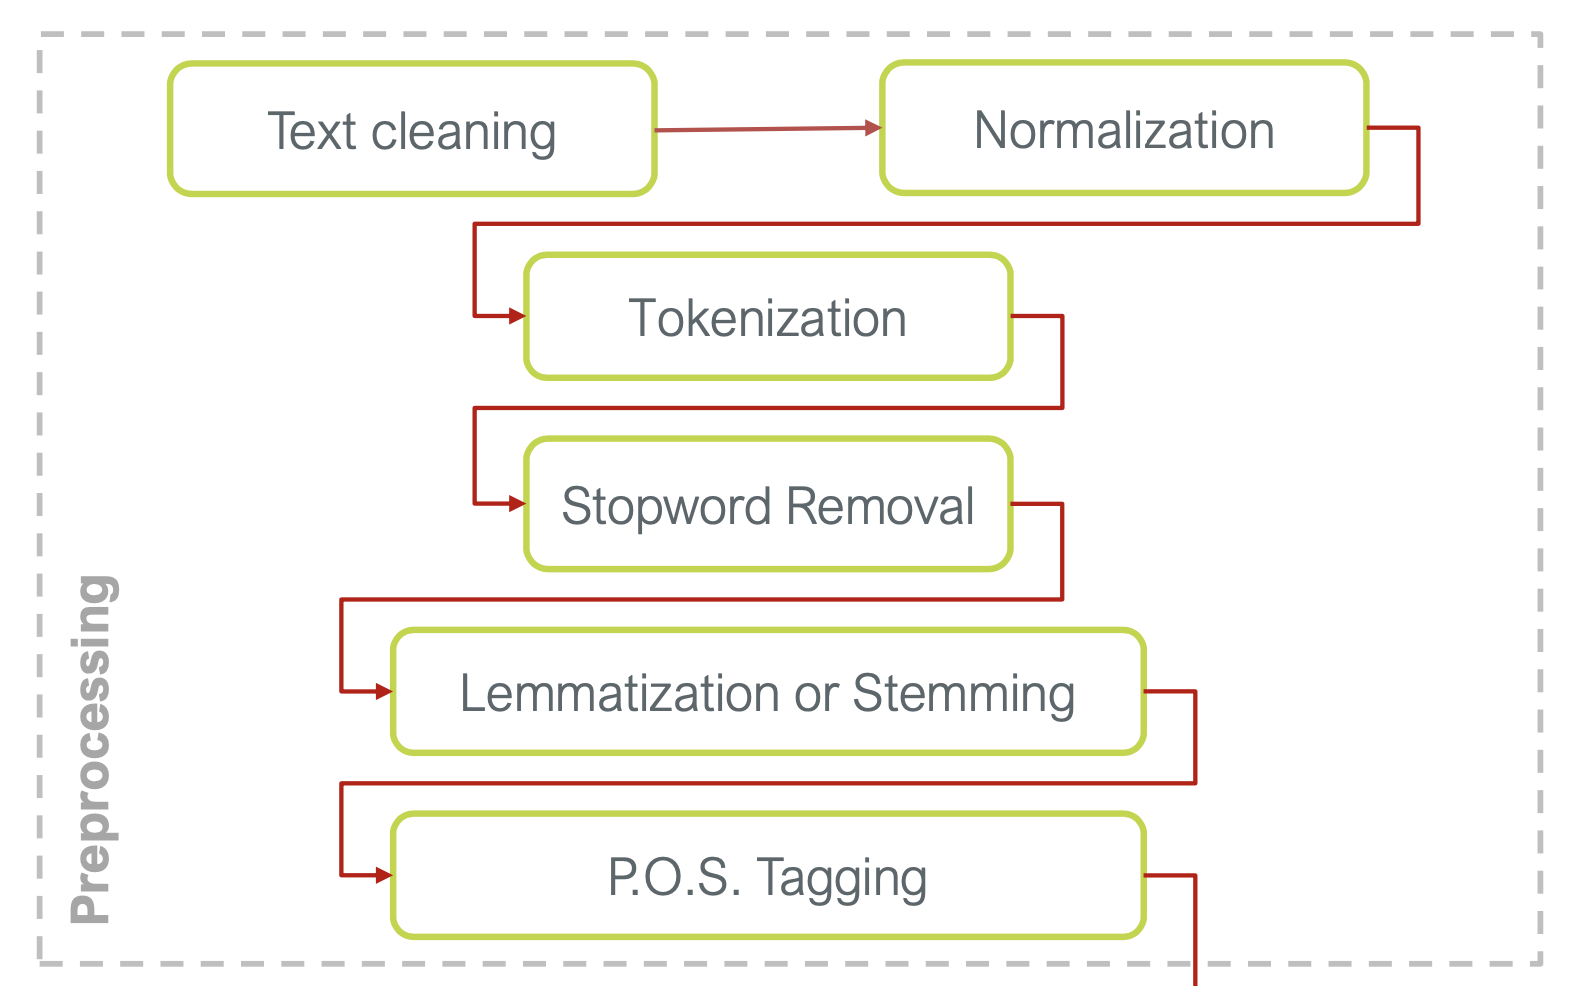

## <font color='#BFD72F'> 1. Installing libraries <font color='#BFD72F'> <a class="anchor" id="P1"></a>
 The following cell needs to be run for the first time only to install the libraries. 

In [ ]:
#Installing libraries
#!pip install nltk
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

## <font color='#BFD72F'> 2. Importing libraries <font color='#BFD72F'> <a class="anchor" id="P2"></a>

In [ ]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import nltk
import re

## <font color='#BFD72F'> 3. Data Importing <font color='#BFD72F'> <a class="anchor" id="P3"></a>

    Importing the data set. In this notebook, we will use the amazon product review data set. 
    Link to the dataset (https://www.kaggle.com/datasets/tarkkaanko/amazon)

In [ ]:
# Import dataset of product reviews 
df = pd.read_csv('amazon_reviews_dataset.csv', index_col=[0])
df.head(3)

In [ ]:
df.info()

## <font color='#BFD72F'> 4. Data Transformation <font color='#BFD72F'> <a class="anchor" id="P4"></a>

    In this section, the needed text data was transformed to string to be processed.

In [ ]:
df['reviewText'] = df['reviewText'].astype(str)
df.head(3)

## <font color='#BFD72F'> 5.Cleaning & Normalization <font color='#BFD72F'> <a class="anchor" id="P5"></a>
    
Text Cleaning is the process of removing noise, irrelevant information and formatting artifacts that could interfere with the text mining tasks.
    
Text Normalization is the task of putting words in a standard format. 

Lower Case

In [ ]:
df['reviewText'] = df['reviewText'].str.lower()
df.head(3)

Showing Special Characters, Punctuations, URLs in the dataset

In [ ]:
df['reviewText'][1]

In [ ]:
df['reviewText'][2]

In [ ]:
df['reviewText'][3]

Removing Special Characters, Punctuations & URLs

In [ ]:
def sub_remove(text):
    x = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return(x)

In [ ]:
df['reviewText'] = df['reviewText'].apply(sub_remove)

In [ ]:
df.head(3)

In [ ]:
df['reviewText'][1]

In [ ]:
df['reviewText'][2]

In [ ]:
df['reviewText'][3]

Removing white spaces

In [ ]:
def sub_spaces(text):
    x = re.sub(r' +', ' ', text)
    return(x)

In [ ]:
df['reviewText'] = df['reviewText'].apply(sub_spaces)

In [ ]:
df['reviewText'][1]

In [ ]:
df['reviewText'][3]

## <font color='#BFD72F'> 6.Tokenization <font color='#BFD72F'> <a class="anchor" id="P6"></a>
It is the process of breaking down a document or a sequence of characters into smaller units named as tokens. It establishes the basic units of analysis.

In [ ]:
regexp = RegexpTokenizer('\w+')

In [ ]:
df['text_token']=df['reviewText'].apply(regexp.tokenize)
df.head(3)

## <font color='#BFD72F'> 7. Stopwords Removal <font color='#BFD72F'> <a class="anchor" id="P7"></a>
Stop words are common words like 'and', 'are', 'this', etc., which do not contribute to the context or content of textual documents.
    
Stopwords are filtered out or excluded from NLP tasks due to their high frequency and lack of significant meaning in the context.

In [ ]:
#nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
# Remove stopwords
df['text_token_filtered'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

In [ ]:
df['text_filtered_string'] = df['text_token_filtered'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [ ]:
df[['reviewText', 'text_token_filtered', 'text_filtered_string']].head()

In [ ]:
all_words = ' '.join([word for word in df['text_filtered_string']])

In [ ]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [ ]:
from nltk.probability import FreqDist

In [ ]:
#nltk.download('punkt')

In [ ]:
fdist = FreqDist(tokenized_words)
fdist

In [ ]:
df['text_string_fdist'] = df['text_token_filtered'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 4 ]))

In [ ]:
df[['reviewText', 'text_token_filtered', 'text_filtered_string', 'text_string_fdist']].head()

In [ ]:
df['reviewText'][3]

In [ ]:
df['text_string_fdist'][3]

## <font color='#BFD72F'> 8. Lemmatization & Stemming <font color='#BFD72F'> <a class="anchor" id="P8"></a>

Lemmatization: The process in which forms are converted into their lemmas – the base forms that you would normally find in a dictionary.
    
The words am, are, and is have the shared lemma be; the words dinner and dinners both have the lemma dinner.

First, We'll split the sentence into list of words

In [ ]:
df['unlemmatized_unstemmed'] = df['text_string_fdist'].str.split()

In [ ]:
df['unlemmatized_unstemmed']

In [ ]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wordnet_lem = WordNetLemmatizer()

In [ ]:
df['text_string_lem'] = df['unlemmatized_unstemmed'].apply(lambda x: [wordnet_lem.lemmatize(y) for y in x]) # Lemmatize every word.

In [ ]:
df['text_string_lem_joined'] = df['text_string_lem'].str.join(' ')

In [ ]:
df[['reviewText', 'text_token_filtered', 'text_filtered_string', 'text_string_fdist','text_string_lem_joined']].head()

In [ ]:
df['text_string_fdist'][112]

In [ ]:
df['text_string_lem_joined'][112]

Stemming : the process of mapping multiple forms of related words to the same common core (called a stem)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
pstemmer = PorterStemmer()

In [ ]:
df['stemmed'] = df['unlemmatized_unstemmed'].apply(lambda x: [pstemmer.stem(y) for y in x]) # Stem every word.

In [ ]:
df[['reviewText', 'text_token_filtered', 'text_filtered_string', 'text_string_fdist','text_string_lem', 'stemmed']]

## <font color='#BFD72F'> 9. POS tagging <font color='#BFD72F'> <a class="anchor" id="P9"></a>
It is the task of assigning each word in a sentence the part of speech that it assumes in that sentence.

   The primary target of POS tagging is to identify the grammatical group of a given word: whether it is a noun, pronoun, adjective, verb, adverbs, etc. based on the context.
    
https://www.nltk.org/api/nltk.tag.pos_tag.html
    
https://www.nltk.org/api/nltk.tag.html

https://gist.githubusercontent.com/yashj302/76b82a90739ebec90120cc1da31c967e/raw/4b608b5d0f41e212267bfa73f97fb7b4275e7e7b/POS%20tag.csv

In [ ]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('universal_tagset')

In [ ]:
from nltk.tag import pos_tag
from nltk.tag import pos_tag_sents
from nltk.tokenize import word_tokenize

Example of pos tag of 1 sentence 

In [ ]:
pos_tag(word_tokenize('think worked 64gb card went one held pretty well since update months zero issues since transferred note2 card reliable'), tagset='universal', lang='eng') 

In [ ]:
df['POSTags'] = pos_tag_sents(df['text_string_lem_joined'].apply(word_tokenize).tolist())

In [ ]:
df['POSTags']

In [ ]:
df['POSTags'][1]

## <font color='#BFD72F'> 10. Exercises <font color='#BFD72F'> <a class="anchor" id="P10"></a>

Q1. Get the Tokens of the 6th comment after cleaning and Normalization 

Q2. Get the Tokens of the 6th comment after removing the stop words

Q3. What is the difference in the number of Tokens between Q1 and Q2 ?

Q4- USe Snowball Stemmer to generate a new column called 'stemmed_snowball'. Check the difference in count between Porter and Snowball stemmer. 

In [ ]:
#df['stemmed_snowball'] =

In [ ]:
#df['stemmed_snowball']

Q4. Generate POS tags for the text provided. 

Q5. What are the DET and PRT mentioned in the previous question? 